<a href="https://colab.research.google.com/github/Balajivasudevan03/Aerofit_business_case_study/blob/main/Aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
df=pd.read_csv("/content/aerofit_treadmill.csv")

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.sample(20)    # no nested data, so no need of satcking

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
56,KP281,31,Female,14,Single,2,2,45480,47
178,KP781,47,Male,18,Partnered,4,5,104581,120
98,KP481,25,Female,14,Single,3,4,43206,127
88,KP481,23,Male,14,Partnered,3,3,38658,85
20,KP281,23,Male,14,Single,4,3,38658,113
119,KP481,32,Male,16,Partnered,3,3,53439,95
46,KP281,28,Male,14,Single,3,3,52302,103
62,KP281,34,Female,16,Single,2,2,52302,66
73,KP281,40,Male,16,Partnered,3,3,61398,66
115,KP481,31,Male,16,Partnered,3,3,52302,95


In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
df["Age"].min(), df["Age"].max()

(18, 50)

In [ ]:
df1=df.copy()

In [ ]:
Age_bins=[17,19,29,39,50]
Age_labels=["Late_teens","Twenties","Thirties","forties"]
df1["Age_in_Decades"]=pd.cut(df1["Age"], bins= Age_bins, labels= Age_labels)

In [ ]:
df1.shape

(180, 10)

In [ ]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades
0,KP281,18,Male,14,Single,3,4,29562,112,Late_teens
1,KP281,19,Male,15,Single,2,3,31836,75,Late_teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,Late_teens
3,KP281,19,Male,12,Single,3,3,32973,85,Late_teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,Twenties
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,forties
176,KP781,42,Male,18,Single,5,4,89641,200,forties
177,KP781,45,Male,16,Single,5,5,90886,160,forties
178,KP781,47,Male,18,Partnered,4,5,104581,120,forties


# 1.0 univariant analysis

# Count plot on Age_in_Decades column

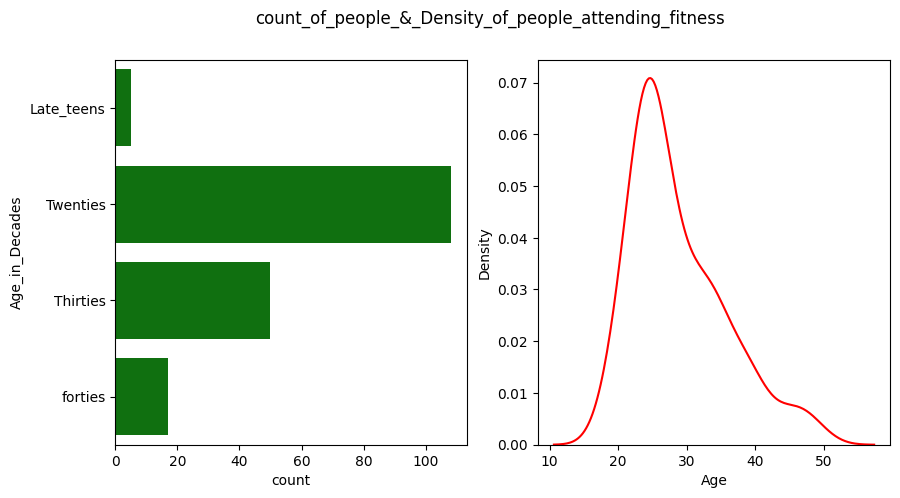

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df1, y = "Age_in_Decades", color="green")
fig.suptitle("count_of_people_&_Density_of_people_attending_fitness")
plt.subplot(1,2,2)
sns.kdeplot(data=df1, x = "Age", color="red")
plt.show()

The two visualizations: a bar plot showing the count of people attending fitness classes segmented by age decades, and a density plot showing the distribution of ages of people attending fitness classes.

### Insights:

1. **Bar Plot (Count of People Attending Fitness Classes by Age Decades):**
   - The majority of attendees are in their twenties, followed by those in their thirties.
   - The number of attendees decreases significantly for those in their forties and late teens.
   - This suggests that fitness classes are most popular among younger adults, particularly those in their twenties.

2. **Density Plot (Age Distribution of People Attending Fitness Classes):**
   - The age distribution shows a peak in the twenties, indicating that this is the most common age group for fitness class attendees.
   - The density decreases steadily after the twenties, with fewer attendees in their thirties, and even fewer in their forties and beyond.
   - The distribution is right-skewed, with a long tail extending into the older age ranges, but the majority of attendees are younger.

### Recommendations:

1. **Target Marketing Efforts:**
   - **Focus on Young Adults:** Given the high participation rate among individuals in their twenties, marketing efforts and promotional activities should be heavily targeted towards this age group.
   - **Appeal to Late Teens:** To increase attendance among late teens, consider special offers or fitness programs designed to appeal to this demographic, such as high-energy classes or teen-friendly workout sessions.

2. **Diversify Fitness Offerings:**
   - **Cater to Older Adults:** Develop fitness programs that are specifically designed for individuals in their thirties and forties. This could include classes that focus on strength training, flexibility, and low-impact exercises that are appealing and suitable for older age groups.
   - **Inclusive Environment:** Ensure that the fitness environment is welcoming and inclusive for all ages. This can be done through targeted communication and creating a community-focused atmosphere.

3. **Create Age-Specific Classes:**
   - **Age-Specific Fitness Programs:** Introduce classes that cater specifically to different age groups, such as "Fitness for Twenties," "Thirty-Something Workouts," and "Fit at Forty." This will allow attendees to feel more comfortable and engaged with peers of similar age.
   - **Varied Intensity Levels:** Offer classes with varying intensity levels to cater to different fitness abilities and preferences across age groups.

4. **Feedback and Adaptation:**
   - **Gather Feedback:** Regularly collect feedback from attendees across different age groups to understand their needs and preferences. Use this feedback to adapt and improve the fitness offerings.
   - **Monitor Trends:** Keep an eye on attendance trends and be prepared to adjust the class schedules and offerings based on changes in demographic participation.

5. **Promotional Campaigns:**
   - **Highlight Benefits:** Run promotional campaigns that highlight the specific benefits of fitness classes for different age groups. For example, emphasize the importance of staying active and healthy in the thirties and forties, and the social and physical benefits for those in their twenties and late teens.

#Impact of age  in buying the product

<ipython-input-15-a741f48378ae>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(data=df1, hue="Product" ,y = "Age_in_Decades", color="orange")


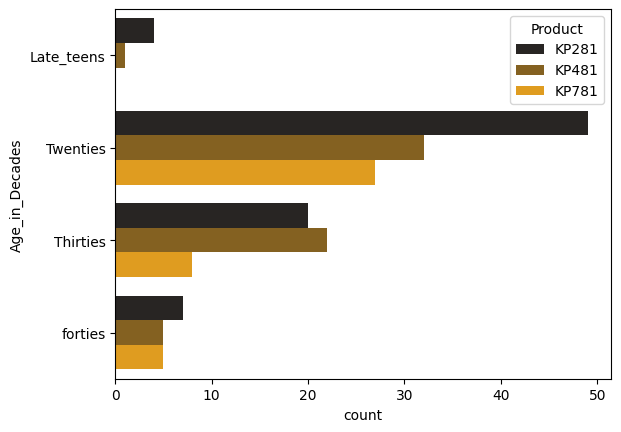

In [ ]:
sns.countplot(data=df1, hue="Product" ,y = "Age_in_Decades", color="orange")
plt.show()

The bar chart shows the distribution of three different products (KP281, KP481, KP781) across various age groups (Late teens, Twenties, Thirties, and Forties).

### Insights:
1. *Product KP281:*
   - Most popular among individuals in their twenties, with a substantial count.
   - Also quite popular among those in their thirties, though less so compared to twenties.
   - Minimal use among late teens and forties.

2. *Product KP481:*
   - Moderate popularity across twenties and thirties, with a slightly higher count in the twenties.
   - Lower usage in late teens and forties.

3. *Product KP781:*
   - Relatively evenly distributed across twenties and thirties, with the twenties having a marginally higher count.
   - Very low usage among late teens and forties.

### Recommendations:
1. *Targeted Marketing:*
   - *Product KP281:* Focus marketing efforts on individuals in their twenties, as they form the largest customer base. Develop campaigns that resonate with the lifestyle and preferences of this age group.
   - *Product KP481 and KP781:* While also popular among twenties and thirties, consider differentiated messaging to appeal to these age groups' specific needs and preferences.

2. *Expanding Reach:*
   - *Late Teens and Forties:* There is a notable gap in usage among late teens and individuals in their forties for all products. Investigate potential barriers (e.g., relevance, awareness) and consider creating tailored marketing strategies or product variations to better meet the needs of these age groups.

3. *Product Development:*
   - Based on the age distribution, consider developing or modifying products to better appeal to underrepresented age groups, particularly late teens and forties. For example, introducing features or benefits that specifically address the interests and needs of these demographics.

4. *Cross-Promotions:*
   - Leverage the popularity of KP281 in the twenties age group to cross-promote KP481 and KP781. This can be done through bundle offers, discounts, or highlighting complementary benefits.

5. *Feedback and Surveys:*
   - Conduct surveys and gather feedback from the underrepresented age groups (late teens and forties) to understand their preferences and reasons for lower usage. Use this data to inform product improvements and marketing strategies.

By utilizing these insights and recommendations, you can better target your marketing efforts, expand your reach, and potentially increase the adoption of your products across different age groups.

# Male Gender density plot for ratings(self ratings)!!!

<ipython-input-16-413035fdb82f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_rating["Fitness"], kde=True, bins=5, color="red")


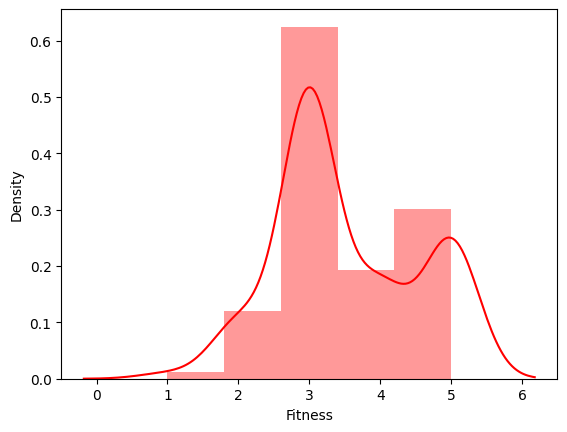

In [ ]:
male_rating = df1[df1["Gender"]=="Male"]
sns.distplot(male_rating["Fitness"], kde=True, bins=5, color="red")
plt.show()

The density plot overlaid on a histogram that shows the distribution of fitness ratings. Here are some insights based on the visualization:

### Insights:

1. **Distribution Shape:**
   - The distribution of fitness ratings appears to be unimodal, with a clear peak around the rating of 3.
   - There is a smaller secondary peak around the rating of 5, indicating another common rating among respondents.

2. **Central Tendency:**
   - The highest density of ratings is around 3, suggesting that the most common fitness rating given by respondents is 3.
   - This peak implies that many respondents perceive their fitness level to be average or moderately good.

3. **Variability:**
   - The density plot shows that the ratings vary, with some respondents rating as low as 1 and as high as 6.
   - The secondary peak around 5 suggests a significant number of respondents consider their fitness level to be quite high.

4. **Skewness:**
   - The distribution is slightly right-skewed, given the presence of the secondary peak and the tail extending towards higher fitness ratings.

### Recommendations:

1. **Fitness Programs Customization:**
   - **Target Average Fitness Levels:** Since most respondents rate their fitness around 3, consider offering programs that are designed for average fitness levels. These could be moderately challenging but accessible to most participants.
   - **Advanced Programs:** Given the secondary peak around 5, also offer more advanced fitness classes or programs to cater to those who consider themselves to be in good shape.

2. **Assessment and Feedback:**
   - **Fitness Assessments:** Implement regular fitness assessments to help participants accurately gauge their fitness levels. This could help in aligning their perceived fitness with actual fitness and encourage improvements.
   - **Feedback Mechanisms:** Create feedback mechanisms where participants can share their experiences and progress. This will help in understanding if the programs meet their fitness levels and where adjustments might be needed.

3. **Marketing Strategies:**
   - **Highlight Diverse Programs:** Promote the availability of a range of fitness programs that cater to different fitness levels, from beginner to advanced. This ensures that all potential participants feel included.
   - **Success Stories:** Share success stories of participants from various fitness levels to motivate and attract individuals who might be unsure about their fitness journey.

# Female Gender density plot for rating(self ratings)!!!

<ipython-input-17-c795a59d3d49>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_rating["Fitness"], kde=True, bins=5, color="red")


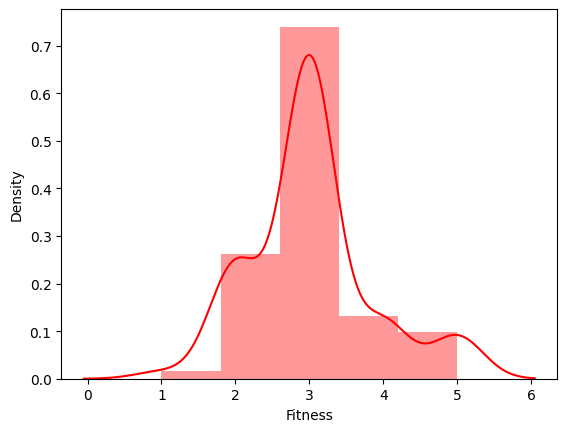

In [ ]:
female_rating = df1[df1["Gender"]=="Female"]
sns.distplot(female_rating["Fitness"], kde=True, bins=5, color="red")
plt.show()

The image shows a distribution plot (histogram with a kernel density estimate, KDE) of a dataset labeled "Fitness" for "female_rating". Here's an analysis and some recommendations based on the plot:

### Insights:

1. *Distribution Shape*:
   - The distribution is unimodal, with a clear peak around a fitness rating of 3. This suggests that the majority of female ratings cluster around this value.
   - The distribution shows a slight right skew, indicated by the longer tail on the right-hand side. This implies that while most ratings are around the central peak, there are a few higher ratings (above 4).

2. *Central Tendency*:
   - The peak of the KDE curve suggests that the most common rating is approximately 3.
   - The KDE curve helps smooth out the histogram, providing a clearer view of the data's distribution, and it supports the observation that the central tendency is around 3.

3. *Density Estimate*:
   - The density values suggest that the highest density is just above 0.7, occurring around the fitness rating of 3.
   - There are fewer ratings below 2 and above 4, as indicated by the lower density values in these regions.

### Recommendations:

1. *Further Analysis*:
   - *Descriptive Statistics*: Calculate mean, median, mode, variance, and standard deviation to complement this visual analysis. These statistics will provide a quantitative measure of the central tendency and variability in the ratings.
   - *Skewness and Kurtosis*: Compute these to get a deeper understanding of the distribution shape and tails.

2. *Data Transformation*:
   - If the right skew is a concern for any analyses you plan to conduct (e.g., regression analysis), consider applying a transformation to the data, such as a logarithmic or square root transformation, to normalize the distribution.

3. *Segment Analysis*:
   - Investigate if there are different segments within the data (e.g., different age groups, locations) that might explain the skewness. Segmenting the data can provide more granular insights.

4. *Comparison with Other Groups*:
   - If you have ratings for other groups (e.g., male ratings), compare the distributions to see if there are significant differences or patterns. This could provide context and additional insights into the data.

5. *Visualizations*:
   - Complement this plot with additional visualizations such as box plots, which can help identify outliers and provide a summary of the data distribution.
   - Use scatter plots or bar charts to explore relationships between fitness ratings and other variables in your dataset.

# Overall slaes of a different product!!!

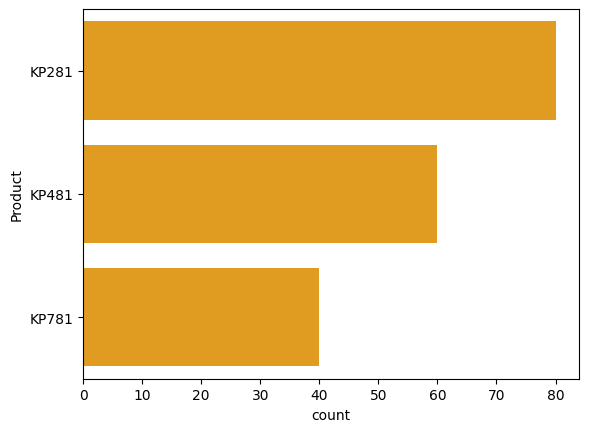

In [ ]:
sns.countplot(data=df1, y = "Product", color="orange")
plt.show()

The shows a horizontal bar chart representing the count of three different products: KP281, KP481, and KP781. Here are the insights and recommendations based on the chart:

### Insights:

1. *Product Popularity*:
   - *KP281*: This product has the highest count, close to 80 units. This indicates that KP281 is the most popular or highest in demand among the three products.
   - *KP481*: This product has the second highest count, around 60 units. While not as popular as KP281, it still has a significant count, suggesting it is also well-received.
   - *KP781*: This product has the lowest count, around 40 units. It is the least popular among the three products.

2. *Relative Comparison*:
   - KP281's count is nearly double that of KP781 and about 20 units more than KP481. This significant difference indicates a strong preference for KP281 over the other products.
   - The difference in counts between KP481 and KP781 suggests a moderate preference for KP481.

### Recommendations:

1. *Inventory Management*:
   - *Increase Stock for KP281*: Given its high demand, ensure that inventory levels for KP281 are sufficient to meet customer needs and avoid stockouts.
   - *Monitor Stock Levels of KP481*: Maintain a good stock level for KP481, as it also has substantial demand.
   - *Evaluate Stock for KP781*: Consider reducing stock levels for KP781 or investigate ways to boost its popularity.

2. *Marketing Strategies*:
   - *Promote KP781*: Implement marketing strategies to increase awareness and demand for KP781. This could include promotions, discounts, or highlighting its unique features.
   - *Leverage KP281’s Popularity*: Use the popularity of KP281 in marketing campaigns to draw attention to other products. For example, bundling KP281 with KP481 or KP781 could help increase sales of the latter.

3. *Product Analysis*:
   - *Customer Feedback*: Gather feedback from customers to understand why KP281 is more popular. Use these insights to improve or reposition KP481 and KP781.
   - *Feature Comparison*: Analyze the features of KP281 that contribute to its high demand and see if similar features can be incorporated into the other products.

4. *Sales Channels*:
   - *Expand Distribution for KP281*: Ensure that KP281 is widely available across all sales channels.
   - *Targeted Campaigns for KP781*: Use targeted advertising to reach potential customers who may be interested in KP781 but are not currently purchasing it.

5. *Price Adjustments*:
   - *Evaluate Pricing Strategy*: Check if pricing is a factor in the popularity of the products. Consider adjusting the price of KP781 to make it more competitive if necessary.

# 2.0 Box Plot---for product & gender & Age columns & MaritalStatus!!!

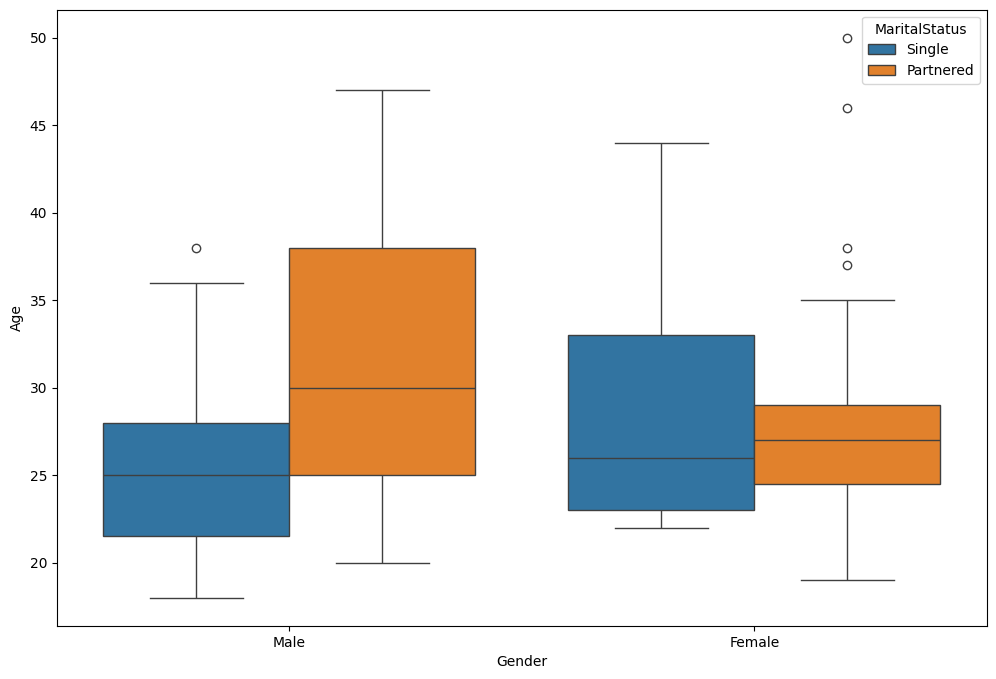

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df1["Age"],x="Gender",hue="MaritalStatus",data=df1[df1["Product"]=="KP281"])
plt.show()

The box plot compares the age distribution of individuals by gender (Male and Female) and marital status (Single and Partnered). Here are some insights and recommendations based on the plot:

### Insights:
1. **Age Distribution for Males**:
   - **Single Males**: The median age is around 25. The interquartile range (IQR) extends from about 22 to 30. There is a single outlier above 35.
   - **Partnered Males**: The median age is higher, around 30. The IQR extends from around 25 to 40, indicating a wider spread of ages among partnered males.

2. **Age Distribution for Females**:
   - **Single Females**: The median age is approximately 28. The IQR ranges from about 24 to 32. There are a couple of outliers above 40.
   - **Partnered Females**: The median age is slightly lower than that of single females, around 27. The IQR is tighter, extending from about 24 to 30, suggesting less variation in the ages of partnered females compared to males.

3. **Comparative Observations**:
   - Partnered individuals generally tend to be older than single individuals.
   - The age range for partnered males is broader compared to partnered females.
   - Single females have a slightly higher median age compared to single males.

### Recommendations:
1. **Targeted Engagement Strategies**:
   - For **marketing or engagement strategies**, consider that partnered individuals tend to be older. Tailor messages for partnered individuals to reflect stability and long-term planning.
   - For single individuals, messages can focus on youth-centric themes and dynamic lifestyles.

2. **Programs and Services**:
   - If providing services like financial planning or health care, develop specific programs for different age brackets. Partnered males might benefit from long-term investment strategies, while single females might be more interested in career development opportunities.

3. **Further Analysis**:
   - Investigate why there is a wider age range among partnered males compared to females. This could be due to cultural, social, or economic factors.
   - Consider performing a deeper analysis to understand the implications of age distribution on other factors such as income, education level, and lifestyle choices.

4. **Policy Making**:
   - For policymakers, recognizing the age differences between single and partnered individuals can help in designing age-appropriate policies, such as those related to housing, employment, and social services.

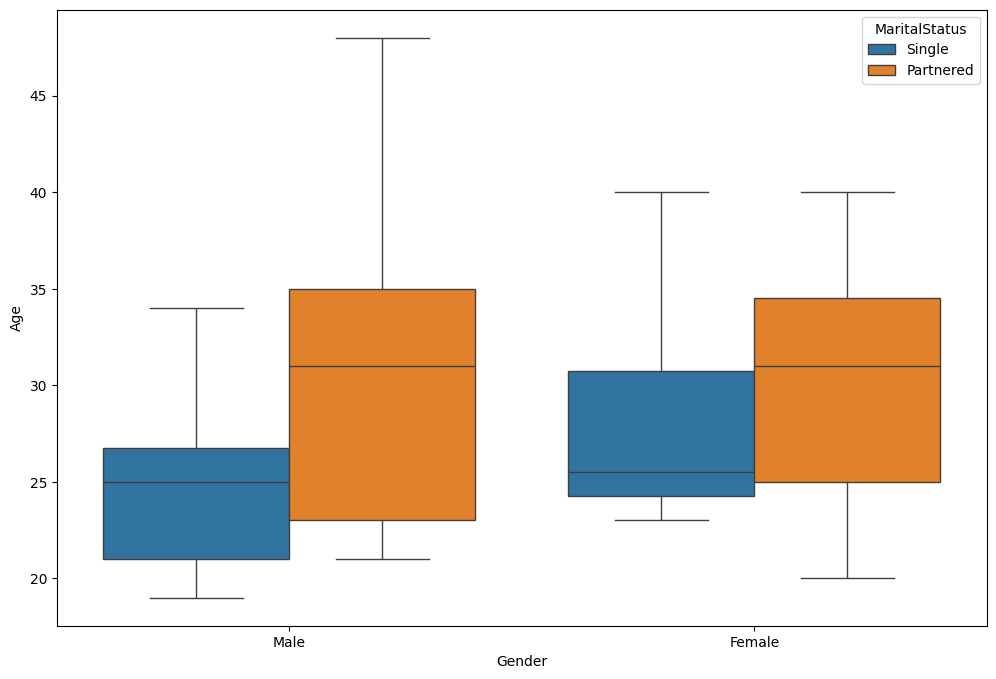

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df1["Age"],x="Gender",hue="MaritalStatus",data=df1[df1["Product"]=="KP481"])
plt.show()

The box plot compares the age distribution of males and females based on their marital status (Single or Partnered). Here are some insights and recommendations based on the visualization:

### Insights:

1. **Median Age:**
   - **Males:**
     - Single males have a median age around 26.
     - Partnered males have a higher median age around 30.
   - **Females:**
     - Single females have a median age around 28.
     - Partnered females also have a higher median age around 31.

2. **Age Range:**
   - **Males:**
     - Single males show a wider age range from about 20 to 35, with a few outliers.
     - Partnered males have an age range from about 25 to 45, indicating a broader age distribution.
   - **Females:**
     - Single females have a tighter age range from about 23 to 35.
     - Partnered females have an age range from about 25 to 40, similar to partnered males but slightly narrower.

3. **Interquartile Range (IQR):**
   - The IQR for partnered individuals (both males and females) is wider than that for single individuals, indicating more variability in age among partnered individuals.

4. **Outliers:**
   - There are more outliers in the single male group, suggesting a few younger individuals among them.

### Recommendations:

1. **Targeted Services:**
   - Given the age differences, services and products aimed at singles may need to cater to a younger demographic, especially for males.
   - Partnered individuals, both male and female, may benefit from services targeted at slightly older age groups.

2. **Marketing Strategies:**
   - Marketing campaigns for singles could focus on younger activities and social events.
   - For partnered individuals, focus could be on family-oriented or couple-centric activities and products.

3. **Policy Making:**
   - If this data is for a community or workplace, policies could be designed to address the different needs of these groups, such as flexible work hours for younger singles and family benefits for older, partnered individuals.

4. **Further Research:**
   - Investigate the reasons behind the age distribution differences between genders and marital statuses to better understand underlying factors.
   - Explore additional demographics (e.g., income, education level) to provide more tailored insights.

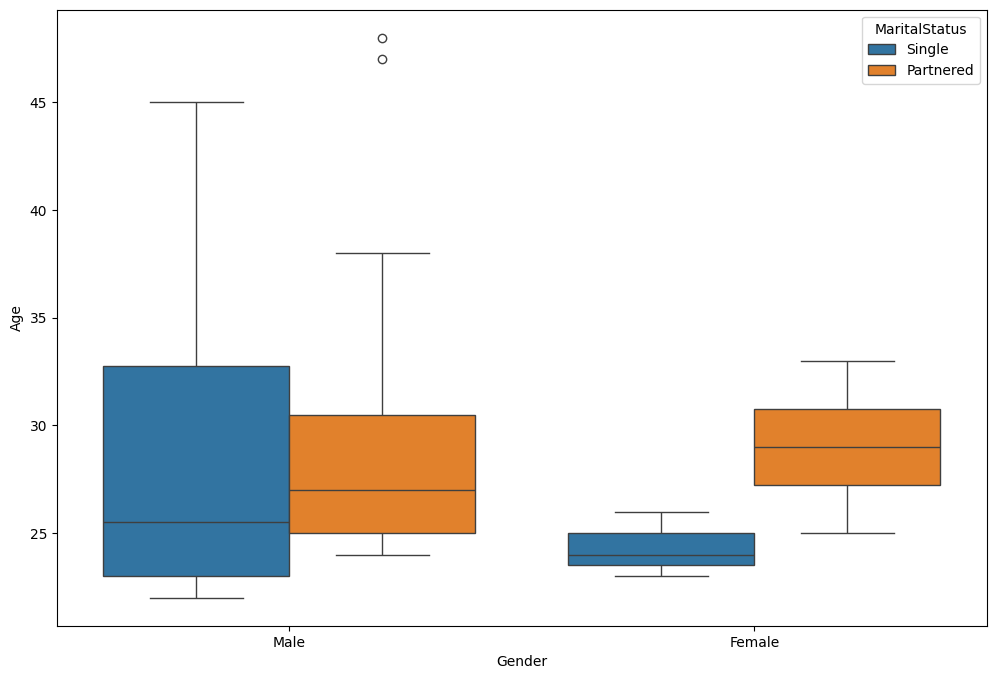

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df1["Age"],x="Gender",hue="MaritalStatus",data=df1[df1["Product"]=="KP781"])
plt.show()

The boxplot shows the distribution of ages by gender and marital status (Single and Partnered). Here are some insights and recommendations based on the data visualization:

### Insights:

1. **Male Single vs. Partnered:**
   - The age distribution for single males has a wider range compared to partnered males.
   - The median age of single males is lower than that of partnered males.
   - There are some outliers in the single male category, indicating a few individuals who are significantly older than the majority.

2. **Female Single vs. Partnered:**
   - The age distribution for single females is much tighter with a smaller range compared to partnered females.
   - The median age for single females is lower than that for partnered females.
   - The age distribution for partnered females is broader than for single females, indicating more variability in age among partnered females.

3. **Comparison between Genders:**
   - Single males tend to have a wider age range and higher median age compared to single females.
   - Partnered females tend to be slightly older than partnered males, based on the medians.
   - The range and spread of ages for partnered males and females are somewhat similar, though females show a bit more spread.

### Recommendations:

1. **Targeted Programs:**
   - **For Single Males:** Given the wide age range and presence of outliers, consider age-specific programs or events that can cater to different age groups within this segment.
   - **For Single Females:** Since the age range is tight, programs can be more generalized but still focus on the younger demographic.

2. **Support for Partnered Individuals:**
   - **For Partnered Females:** Considering the broader age range, ensure that programs and services are inclusive of both younger and older individuals.
   - **For Partnered Males:** Programs can be slightly more focused compared to females due to the narrower age range.

3. **Community Engagement:**
   - Create opportunities for mixed-gender and mixed-status interactions to foster community cohesion and support networks.

4. **Further Analysis:**
   - Investigate the reasons behind the age outliers in the single male category to understand if there are specific needs or issues that should be addressed.
   - Conduct qualitative research to understand the lifestyle differences between single and partnered individuals that may explain the observed age distributions.

5. **Data Segmentation:**
   - Segment further by other demographics such as employment status, education level, or geographic location to tailor programs more effectively.

# Relation between the product count and martial_status!!!

In [ ]:
product_and_maritalStatus = df1.groupby(["Product","MaritalStatus"]).size().reset_index(name="counts").sort_values("counts",ascending=False)
product_and_maritalStatus

,Product,MaritalStatus,counts
0,KP281,Partnered,48
2,KP481,Partnered,36
1,KP281,Single,32
3,KP481,Single,24
4,KP781,Partnered,23
5,KP781,Single,17


# relation between product and marital status

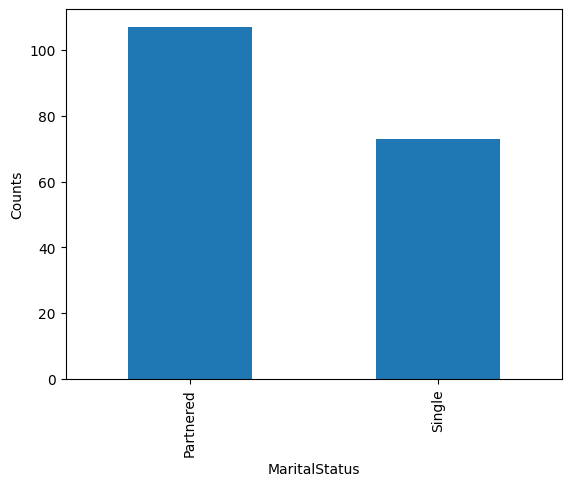

In [ ]:
product_and_maritalStatus.groupby("MaritalStatus")["counts"].sum().plot(kind="bar")
plt.ylabel("Counts")
plt.show()

The image shows a bar chart representing the count of individuals based on their marital status: "Partnered" and "Single". Here are the insights and recommendations based on the chart:

### Insights:

1. *Marital Status Distribution*:
   - *Partnered*: There are approximately 110 individuals who are partnered, making this the more prevalent marital status in the dataset.
   - *Single*: There are about 70 individuals who are single, which is notably less than the number of partnered individuals.

2. *Proportion Comparison*:
   - The number of partnered individuals is significantly higher than the number of single individuals. Specifically, the count of partnered individuals is approximately 1.5 times the count of single individuals.

### Recommendations:

1. *Targeted Marketing*:
   - *For Partnered Individuals*: Since partnered individuals are the majority, marketing strategies can be tailored to appeal to couples or families. Promotions, services, and products can be designed with couples in mind.
   - *For Single Individuals*: Develop campaigns that cater to single individuals. Highlight products and services that are ideal for single lifestyles or promote social events that could interest this demographic.

2. *Service Customization*:
   - *Partnered Individuals*: Consider offering services that are more attractive to partnered individuals, such as couple discounts, family packages, or relationship-oriented activities.
   - *Single Individuals*: Provide services that are tailored to single individuals, like social gatherings, singles' discounts, or activities that encourage socializing and networking.

3. *Event Planning*:
   - *For Couples*: Plan events that are appealing to couples, such as date nights, couple workshops, or family-friendly activities.
   - *For Singles*: Organize events that cater to single people, such as singles' mixers, solo travel opportunities, or hobby groups.

4. *Product Development*:
   - *Partnered Individuals*: Develop products that cater to the needs of couples or families, like home improvement items, family-sized groceries, or entertainment packages.
   - *Single Individuals*: Focus on products that suit single lifestyles, such as single-serving meals, personal development tools, or travel packages for one.

5. *Survey and Feedback*:
   - *Understanding Needs*: Conduct surveys or focus groups to understand the specific needs and preferences of both partnered and single individuals. Use this information to tailor services and products more effectively.
   - *Feedback Collection*: Regularly collect feedback from both groups to continually refine and improve offerings.

6. *Community Building*:
   - *For Partnered Individuals*: Create community programs that encourage interaction among couples and families, fostering a sense of belonging and support.
   - *For Single Individuals*: Develop programs that help single individuals connect with others, build friendships, and find support networks.

# 3.0 Extracting/Dectecting the outliers for all the continous columns!!!

# Detecting the outliers for income column!!!

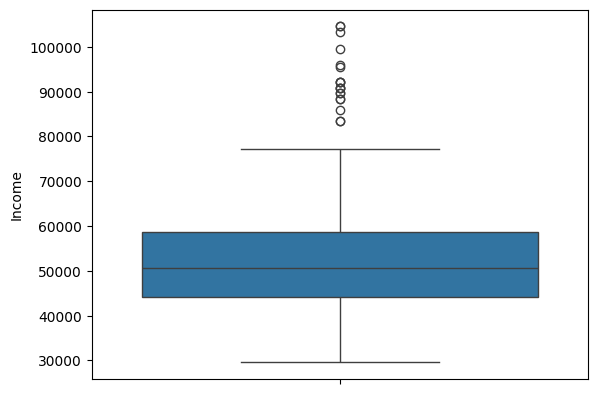

In [ ]:
income_outliers = sns.boxplot(data=df1["Income"])
plt.show()

In [ ]:
income_outliers_95_percentile = np.percentile(df1["Income"], 95)
income_outliers_05_percentile = np.percentile(df1["Income"], 5)

In [ ]:
real_outliers_income = df1[(df1["Income"]>income_outliers_95_percentile)|(df1["Income"]<income_outliers_05_percentile)]

In [ ]:
real_outliers_income.shape

(18, 10)

In [ ]:
real_outliers_income["Income"].describe()

count        18.000000
mean      64925.777778
std       34000.490864
min       29562.000000
25%       32973.000000
50%       62552.000000
75%       95776.500000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
real_outliers_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades
0,KP281,18,Male,14,Single,3,4,29562,112,Late_teens
1,KP281,19,Male,15,Single,2,3,31836,75,Late_teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,Late_teens
3,KP281,19,Male,12,Single,3,3,32973,85,Late_teens
5,KP281,20,Female,14,Partnered,3,3,32973,66,Twenties
7,KP281,21,Male,13,Single,3,3,32973,85,Twenties
80,KP481,19,Male,14,Single,3,3,31836,64,Late_teens
81,KP481,20,Male,14,Single,2,3,32973,53,Twenties
86,KP481,21,Male,12,Partnered,2,2,32973,53,Twenties
162,KP781,28,Female,18,Partnered,6,5,92131,180,Twenties


# Detecting the outliers for Miles column

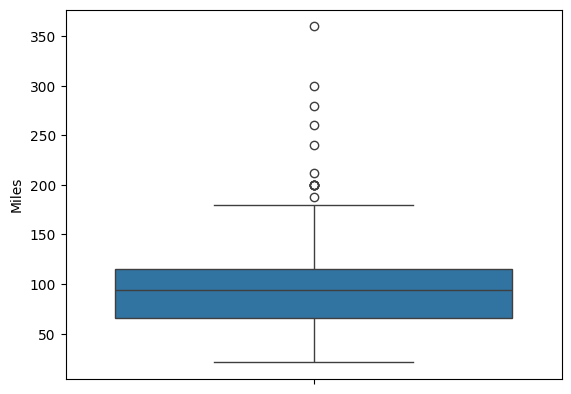

In [ ]:
miles_outliers = sns.boxplot(data=df1["Miles"])
plt.show()

In [ ]:
miles_outliers_95_percentile = np.percentile(df1["Miles"], 95)
miles_outliers_05_percentile = np.percentile(df1["Miles"], 5)

In [ ]:
real_outliers_miles = df1[(df1["Miles"]>miles_outliers_95_percentile)|(df1["Miles"]<miles_outliers_05_percentile)]
real_outliers_miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades
19,KP281,23,Female,15,Partnered,2,2,34110,38,Twenties
51,KP281,29,Female,14,Partnered,2,2,46617,38,Twenties
59,KP281,33,Female,16,Single,2,2,55713,38,Thirties
84,KP481,21,Female,14,Partnered,5,4,34110,212,Twenties
85,KP481,21,Male,16,Partnered,2,2,34110,42,Twenties
99,KP481,25,Male,16,Partnered,2,2,52302,42,Twenties
106,KP481,25,Female,14,Single,2,2,45480,42,Twenties
117,KP481,31,Female,18,Single,2,1,65220,21,Thirties
138,KP481,45,Male,16,Partnered,2,2,54576,42,forties
155,KP781,25,Male,18,Partnered,6,5,75946,240,Twenties


In [ ]:
real_outliers_income["Miles"].describe()

count     18.000000
mean     128.277778
std       75.440515
min       53.000000
25%       68.250000
50%      116.000000
75%      157.500000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
real_outliers_miles.shape

(14, 10)

# Detecting the outliers for Usage column

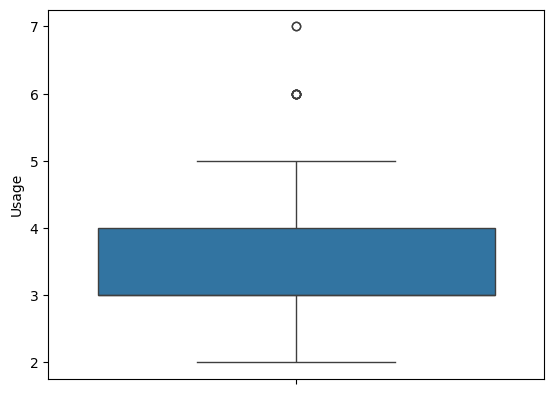

In [ ]:
usage_outliers = sns.boxplot(data=df1["Usage"])
plt.show()

In [ ]:
usage_outliers_95_percentile = np.percentile(df1["Usage"], 95)
usage_outliers_05_percentile = np.percentile(df1["Usage"], 5)

In [ ]:
real_outliers_usage = df1[(df1["Usage"]>usage_outliers_95_percentile)|(df1["Usage"]<usage_outliers_05_percentile)]
real_outliers_usage

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades
154,KP781,25,Male,18,Partnered,6,4,70966,180,Twenties
155,KP781,25,Male,18,Partnered,6,5,75946,240,Twenties
162,KP781,28,Female,18,Partnered,6,5,92131,180,Twenties
163,KP781,28,Male,18,Partnered,7,5,77191,180,Twenties
164,KP781,28,Male,18,Single,6,5,88396,150,Twenties
166,KP781,29,Male,14,Partnered,7,5,85906,300,Twenties
167,KP781,30,Female,16,Partnered,6,5,90886,280,Thirties
170,KP781,31,Male,16,Partnered,6,5,89641,260,Thirties
175,KP781,40,Male,21,Single,6,5,83416,200,forties


In [ ]:
real_outliers_income["Usage"].describe()

count    18.000000
mean      3.722222
std       1.178511
min       2.000000
25%       3.000000
50%       4.000000
75%       4.750000
max       6.000000
Name: Usage, dtype: float64

In [ ]:
real_outliers_usage.shape

(9, 10)

# Detecting the outliers for Education column

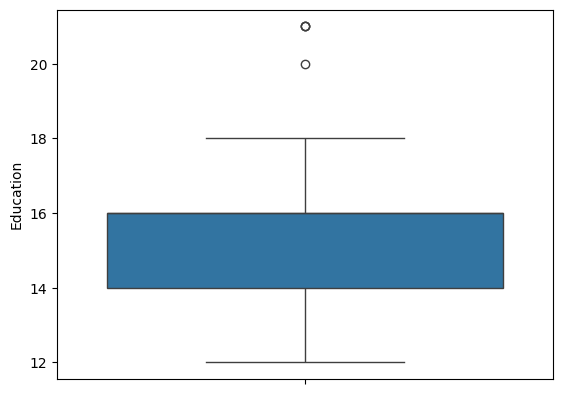

In [ ]:
education_outliers = sns.boxplot(data=df1["Education"])
plt.show()

In [ ]:
education_outliers_95_percentile = np.percentile(df1["Education"], 95)
education_outliers_05_percentile = np.percentile(df1["Education"], 5)

In [ ]:
real_outliers_education = df1[(df1["Education"]>education_outliers_95_percentile)|(df1["Education"]<education_outliers_05_percentile)]
real_outliers_education

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades
3,KP281,19,Male,12,Single,3,3,32973,85,Late_teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,Twenties
7,KP281,21,Male,13,Single,3,3,32973,85,Twenties
25,KP281,24,Male,13,Partnered,3,2,42069,47,Twenties
66,KP281,36,Male,12,Single,4,3,44343,94,Thirties
86,KP481,21,Male,12,Partnered,2,2,32973,53,Twenties
114,KP481,30,Female,13,Single,4,3,46617,106,Thirties
120,KP481,33,Male,13,Partnered,4,4,53439,170,Thirties
156,KP781,25,Male,20,Partnered,4,5,74701,170,Twenties
157,KP781,26,Female,21,Single,4,3,69721,100,Twenties


In [ ]:
real_outliers_income["Education"].describe()

count    18.000000
mean     15.555556
std       2.254987
min      12.000000
25%      14.000000
50%      15.500000
75%      18.000000
max      18.000000
Name: Education, dtype: float64

In [ ]:
real_outliers_education.shape

(12, 10)

# 4. Representing the Probability

# Find the marginal probability (what percent of customers have purchased
  KP281, KP481, or KP781)

In [ ]:
df1["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
KP281_percentage =(df1[df1["Product"]=='KP281'].shape[0]/df1.shape[0])*100
KP281_percentage

44.44444444444444

In [ ]:
KP481_percentage = (df1[df1["Product"]=='KP481'].shape[0]/df1.shape[0])*100
KP481_percentage

33.33333333333333

In [ ]:
KP781_percentage = (df1[df1["Product"]=='KP781'].shape[0]/df1.shape[0])*100
KP781_percentage

22.22222222222222

In [ ]:
KP281_percentage + KP481_percentage + KP781_percentage

100.0

# Find the probability that the customer buys a product based on each column.

In [ ]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades
0,KP281,18,Male,14,Single,3,4,29562,112,Late_teens
1,KP281,19,Male,15,Single,2,3,31836,75,Late_teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,Late_teens
3,KP281,19,Male,12,Single,3,3,32973,85,Late_teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,Twenties
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,forties
176,KP781,42,Male,18,Single,5,4,89641,200,forties
177,KP781,45,Male,16,Single,5,5,90886,160,forties
178,KP781,47,Male,18,Partnered,4,5,104581,120,forties


# marginal and conditional probabilities

In [ ]:
pd.crosstab(index=df1["Product"],columns = df1["MaritalStatus"], margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


# probability of patnered and single people is:
p(patnered) = 107/180 and p(single) = 73/180

# conditional probability
# Find the conditional probability that an event occurs given that another  
event has
occurred. (Example: given that a customer is Partnered or Single, what is the probability
she’ll purchase a KP481)

p(KP781|patnered) = p(KP781 intersect patnered)/p(patnered)

solution ---->>   23/107

In [ ]:
pd.crosstab(index=df1["Product"],columns = df1["Age"], margins=True)

Age,18,19,20,21,22,23,24,25,26,27,...,41,42,43,44,45,46,47,48,50,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,3,2,4,4,8,5,7,7,3,...,1,0,1,1,0,1,1,0,1,80
KP481,0,1,3,3,0,7,3,11,3,1,...,0,0,0,0,1,0,0,1,0,60
KP781,0,0,0,0,3,3,4,7,2,3,...,0,1,0,0,1,0,1,1,0,40
All,1,4,5,7,7,18,12,25,12,7,...,1,1,1,1,2,1,2,2,1,180


In [ ]:
pd.crosstab(index=df1["Product"],columns = df1["Age_in_Decades"], margins=True)

Age_in_Decades,Late_teens,Twenties,Thirties,forties,All
Product,,,,,
KP281,4,49,20,7,80
KP481,1,32,22,5,60
KP781,0,27,8,5,40
All,5,108,50,17,180


In [ ]:
# so the probability of buying KP281,KP481,KP781 tread-mill amoung twenties people is:
49/108, 32/108, 27/108

(0.4537037037037037, 0.2962962962962963, 0.25)

In [ ]:
# what is the probability of people buying less than 50 tread-mill in all three products:
A=(17/180 + 5/180)
# what is the probability of people buying more than 50 tread-mill in all three products:
B=(108/180 +50/180)
# therefore:
A+B==1 #----->>>>#which is a total probability...

True

# Find the conditional probability that an event occurs given that another  
event has
occurred. (Example: given that a customer is female, what is the probability
she’ll purchase a KP481)

In [ ]:
pd.crosstab(index=df1["Product"],columns = df1["Gender"], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


# so the answer to the above question is that:
formula---->>>p(KP481|female)=p(KP481 intersect female)/p(female)
            
solution---->>>>>=29/76

In [ ]:
pd.crosstab(index=df1["Product"],columns = df1["Education"], margins=True)

Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,2,3,30,4,39,2,0,0,80
KP481,1,2,23,1,31,2,0,0,60
KP781,0,0,2,0,15,19,1,3,40
All,3,5,55,5,85,23,1,3,180


# Calculating the probability for income column by creatting the bins out of it and calclating the various probability for the income column.

In [ ]:
income_bins=[10000,30000,60000,90000,120000]
income_labels=["10K-30K","30K-60K","60K-90K","90K-120K"]
df1["income_in_K"]=pd.cut(df1["Income"], bins= income_bins, labels= income_labels)
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_in_Decades,income_in_K
0,KP281,18,Male,14,Single,3,4,29562,112,Late_teens,10K-30K
1,KP281,19,Male,15,Single,2,3,31836,75,Late_teens,30K-60K
2,KP281,19,Female,14,Partnered,4,3,30699,66,Late_teens,30K-60K
3,KP281,19,Male,12,Single,3,3,32973,85,Late_teens,30K-60K
4,KP281,20,Male,13,Partnered,4,2,35247,47,Twenties,30K-60K
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,forties,60K-90K
176,KP781,42,Male,18,Single,5,4,89641,200,forties,60K-90K
177,KP781,45,Male,16,Single,5,5,90886,160,forties,90K-120K
178,KP781,47,Male,18,Partnered,4,5,104581,120,forties,90K-120K


In [ ]:
pd.crosstab(index=df1["Product"],columns = df1["income_in_K"], margins=True)

income_in_K,10K-30K,30K-60K,60K-90K,90K-120K,All
Product,,,,,
KP281,1,73,6,0,80
KP481,0,53,7,0,60
KP781,0,11,17,12,40
All,1,137,30,12,180


----->>> what is the probability of buying the treadmill of people with income 30K-60K:

solution : 137/180

----->>> what is the probability of buying the treadmill given that earining is between 30K-60K and in the product is KP481:

solution : 53/137

like wise we can calculate for n-number probability here.

# 5. Check the correlation among different factors

In [ ]:
df1.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


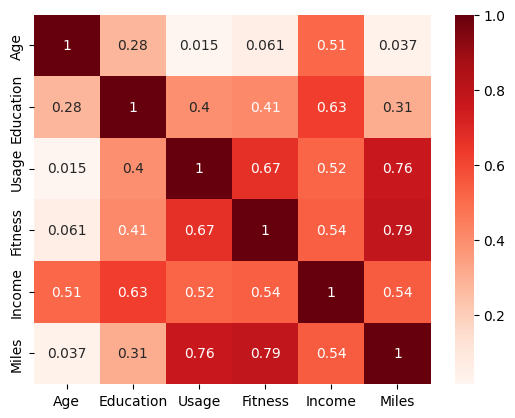

In [ ]:
sns.heatmap(df1.corr(numeric_only=True),annot=True,cmap="Reds")
plt.show()

The heatmap illustrates the correlation between various variables: Age, Education, Usage, Fitness, Income, and Miles.

### Insights:
1. *Strong Correlations:*
   - *Usage and Miles (0.76):* There is a strong positive correlation between the usage and the number of miles, indicating that as usage increases, the number of miles also increases significantly.
   - *Fitness and Miles (0.79):* A strong correlation exists between fitness levels and miles, suggesting that higher fitness levels are associated with more miles.

2. *Moderate Correlations:*
   - *Education and Usage (0.40):* There is a moderate positive correlation between education and usage.
   - *Education and Fitness (0.41):* Education also shows a moderate correlation with fitness levels.
   - *Education and Income (0.63):* Higher levels of education are moderately correlated with higher income.
   - *Fitness and Income (0.54):* Fitness levels are moderately correlated with income, indicating that individuals with higher incomes tend to have better fitness levels.

3. *Weak to No Correlations:*
   - *Age and Education (0.28):* Age shows a weak positive correlation with education.
   - *Age and Income (0.51):* Age has a weak to moderate correlation with income.
   - *Age and Fitness (0.061):* There is almost no correlation between age and fitness.
   - *Age and Miles (0.037):* Age shows almost no correlation with the number of miles.
   - *Income and Miles (0.54):* Income and miles show a moderate correlation.

### Recommendations:
1. *Targeted Fitness Programs:*
   - *Education-Based Fitness Initiatives:* Develop fitness programs tailored to different education levels, given the correlation between education and fitness.
   - *Income-Based Fitness Incentives:* Introduce fitness incentives or programs for higher income groups who already show a moderate correlation with fitness levels.

2. *Promoting Usage for Higher Fitness:*
   - *Usage Increase Strategies:* Implement strategies to increase the usage of fitness-related services or products, which could, in turn, increase overall fitness levels and the number of miles.

3. *Data-Driven Marketing:*
   - *Targeted Advertising:* Use the correlation data to target advertising campaigns for fitness products or services towards individuals with higher education and income levels, as these groups are more likely to engage and benefit.

4. *Holistic Health Programs:*
   - *Integrated Health Campaigns:* Create integrated health campaigns that simultaneously promote education, fitness, and usage of services to maximize impact.

5. *Further Analysis:*
   - *Deeper Dive into Weak Correlations:* Conduct further research into the weak correlations (e.g., Age and Fitness, Age and Miles) to understand underlying factors and possibly uncover hidden patterns or trends.

By leveraging these insights, organizations can develop more effective strategies for promoting fitness and usage of related services, thereby enhancing overall health and well-being.

# 6. Customer profiling for KP281 and recommendation

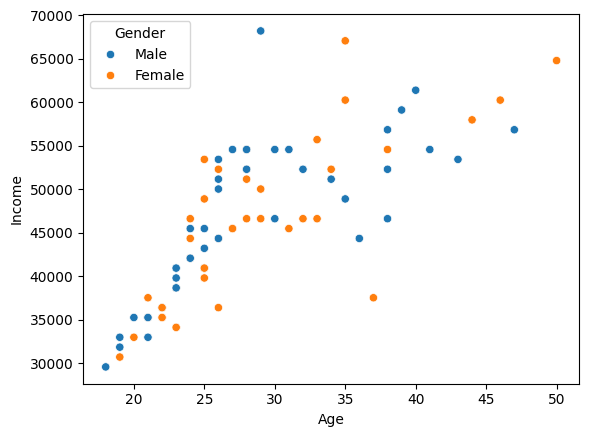

In [ ]:
Customer_profiling_KP281 = df1[df1["Product"]=="KP281"]
sns.scatterplot(x="Age",y="Income",data=Customer_profiling_KP281,hue="Gender")
plt.show()

The scatter shows the relationship between age and income, with data points differentiated by gender (Male and Female).

### Insights:
1. *Income Trends by Age:*
   - For both genders, income generally increases with age, particularly noticeable from early 20s to mid-30s.
   - There is a notable plateau in income growth around the ages of 30 to 35.
   - After 35, the income variability increases, showing a wide range of incomes for both genders.

2. *Gender Comparison:*
   - Up to around age 35, males and females have relatively similar income distributions, although there is a slight indication that males might have a marginally higher income.
   - Post-35, the data shows more pronounced income disparities, with males displaying a wider range of higher incomes compared to females.

3. *Income Ceiling:*
   - The highest income levels are predominantly observed among males, particularly those aged between 30 and 45.
   - Females also have high-income outliers but are fewer compared to their male counterparts.

### Recommendations:
1. *Addressing Income Disparity:*
   - *Policy and Organizational Measures:* Implement policies promoting pay equity and transparency within organizations to address potential income disparities by gender.
   - *Career Development Programs:* Encourage career development and leadership programs for females, especially targeting mid-career stages (ages 30-40) where disparity becomes more noticeable.

2. *Support for Career Advancement:*
   - *Mentorship and Sponsorship:* Develop mentorship and sponsorship programs that can support career advancement for both genders, with a focus on reducing gender-based income disparities.
   - *Work-Life Balance Initiatives:* Implement initiatives supporting work-life balance to help sustain career growth for females, who may face career interruptions more frequently.

3. *Further Data Analysis:*
   - *Sector-Specific Analysis:* Conduct a sector-specific analysis to understand if certain industries exhibit more pronounced income disparities and target interventions accordingly.
   - *Longitudinal Studies:* Implement longitudinal studies to track career progression over time and identify critical points where interventions could be most effective.

4. *Promoting Diversity:*
   - *Inclusion Programs:* Promote diversity and inclusion programs within workplaces to create an environment supportive of career growth for all genders.
   - *Training and Awareness:* Provide training programs to raise awareness about unconscious bias and its impact on career progression and income.

By addressing these areas, it is possible to create a more equitable and supportive environment that fosters income growth and reduces disparities between genders.

# Customer profiling for KP481 and recommendation

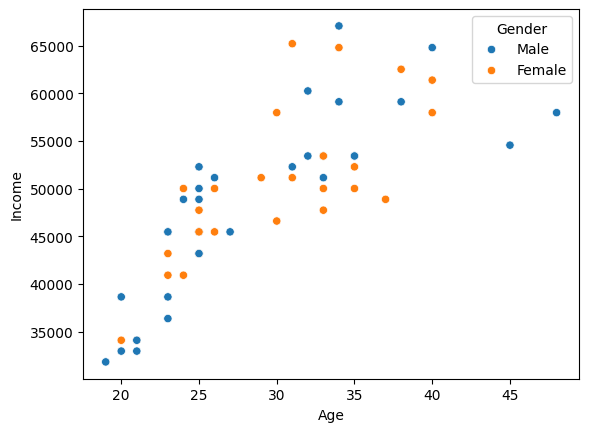

In [ ]:
Customer_profiling_KP481 = df1[df1["Product"]=="KP481"]
sns.scatterplot(x="Age",y="Income",data=Customer_profiling_KP481,hue="Gender")
plt.show()

This scatter shows the relationship between age and income, with data points color-coded by gender (male and female). Here are the insights and recommendations based on the visualized data:

### Insights:
1. **Income Distribution by Age**:
   - Both males and females show an increase in income with age until about age 35, after which the income levels off.
   - The highest income level in the dataset is around \$65,000, with individuals reaching this income typically between the ages of 35 and 45.

2. **Gender Income Trends**:
   - Females (orange dots) appear to have a more consistent presence across different income levels compared to males.
   - In the age range of 20-30, both genders have a relatively equal distribution in income.
   - From age 30 onwards, females are more represented in the higher income brackets compared to males.

3. **Income Peaks**:
   - There are noticeable clusters where incomes peak for both genders, particularly around ages 25-30 and 35-40.

### Recommendations:
1. **Targeted Marketing and Services**:
   - **Young Adults (20-30)**: Offer financial education and early career support programs. Highlight investment opportunities that cater to their growing income.
   - **Mid-Career Professionals (30-45)**: Focus on products and services that support wealth management, retirement planning, and lifestyle upgrades.

2. **Gender-Specific Initiatives**:
   - Encourage more female participation in high-paying roles or industries, given their strong presence in higher income brackets.
   - Implement mentorship and leadership programs aimed at supporting women in their career progression, especially in sectors where income growth is prominent.

3. **Research and Analysis**:
   - Conduct further research to understand the factors influencing income disparities and growth trends across different age groups and genders.
   - Analyze the specific industries or job roles that contribute to higher income levels for better-targeted career guidance and support services.

4. **Educational Programs**:
   - Promote continuous learning and development programs to help individuals increase their earning potential, particularly as they approach mid-career stages.
   - Offer workshops and seminars focused on negotiation skills, career advancement, and financial planning to help bridge any existing income gaps.

By leveraging these insights and recommendations, strategies can be developed to better meet the needs of different customer segments, fostering both individual financial growth and broader economic benefits.

# Customer profiling for KP781 and recommendation

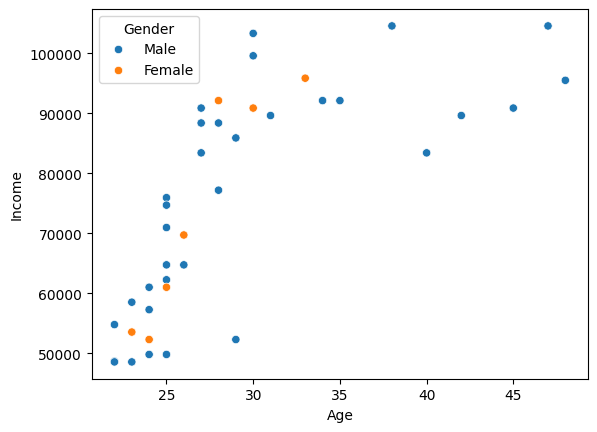

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Customer_profiling_KP781 = df1[df1["Product"]=="KP781"]
sns.scatterplot(x="Age",y="Income",data=Customer_profiling_KP781,hue="Gender")
plt.show()
plt.savefig("Customer_profiling_KP781.jpg", format="jpg")
plt.close()
files.download("Customer_profiling_KP781.jpg")

The scatter plot represents the relationship between age and income, with data points differentiated by gender. Here are some insights and recommendations based on the visualized data:

### Insights:
1. **Income Distribution**:
   - **Males** (blue dots) generally dominate the higher income brackets.
   - **Females** (orange dots) are more evenly distributed across different income levels, but there are fewer females in the highest income brackets compared to males.

2. **Age and Income Correlation**:
   - There is a noticeable trend where income increases with age up to a certain point (approximately age 35), after which the income levels off or slightly declines.
   - Most high-income individuals are in the age range of 25-35.

### Recommendations:
1. **Targeted Marketing**:
   - **High-Income Segments**: Focus marketing efforts on males aged 25-35, as they form a significant portion of the high-income segment.
   - **Diverse Strategies**: Develop different marketing strategies for males and females, especially for age groups where income disparity is evident.

2. **Product Development**:
   - Create products or services that cater to the financial capacity of high-income individuals aged 25-35.
   - Develop affordable options for younger individuals who are still in the lower income brackets.

4. **Age-Specific Campaigns**:
   - For younger demographics (under 30), highlight financial planning and investment opportunities that can help increase their income.
   - For older demographics, emphasize retirement planning and wealth management services.

By understanding and leveraging these insights, strategies can be formulated to better cater to the diverse needs of different customer segments.